In [1]:
import data
from fastai.vision import open_image, open_mask, learner
import torch

import matplotlib.pyplot as plt

In [2]:
imgs, lbls = [], []
for img in data.data_dirs.get_subdir("test iPhoneXR images").iterdir():
    imgs += [open_image(img, after_open=lambda x: x.resize([256, 256]))]
    lbls += [open_mask(data.get_label_with_context(img), div=True, after_open=lambda x:
                      x.resize([256, 256]))]
    
model = learner.load_learner("/home/dmitri/Documents/model_weights/linknet34/", "linknet34_osp_full_e25_exp_without_logit_1e-03")
_, torch_mask, _ = model.predict(imgs[1])

In [3]:
white_canvas = torch.ones_like(torch_mask) * 255
intersection = torch.masked_fill(white_canvas, (torch_mask == 0) & (lbls[1].data == 0), 0)
intersection = intersection.squeeze(0)
intersection = intersection.unsqueeze(2)
white_canvas = torch.ones_like(intersection) * 255
intersection = torch.cat([intersection, intersection, white_canvas], dim=2)

intersection.size()

torch.Size([256, 256, 3])

In [4]:
white_canvas = torch.ones_like(torch_mask) * 255
union = torch.masked_fill(white_canvas, (torch_mask == 0) | (lbls[1].data == 0), 0)
union = union.squeeze(0)
union = union.unsqueeze(2)
white_canvas = torch.ones_like(union) * 255
union = torch.cat([white_canvas, union, union], dim=2)

union.size()

torch.Size([256, 256, 3])

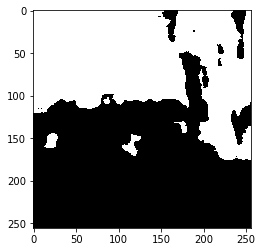

In [5]:
plt.figure()
plt.imshow(torch_mask.squeeze(dim = 0).bitwise_not().numpy(), cmap="Greys")
plt.savefig("/home/dmitri/dev/BachelorDiploma/thesis/mmcs_sfedu_thesis/img/iou_vis/predicted.png")

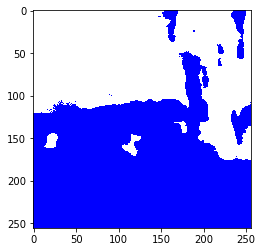

In [6]:
plt.figure()
plt.imshow(intersection.squeeze(dim = 0).numpy())
plt.savefig("/home/dmitri/dev/BachelorDiploma/thesis/mmcs_sfedu_thesis/img/iou_vis/intersection.png")

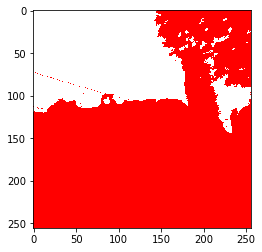

In [7]:
plt.figure()
plt.imshow(union.squeeze(dim = 0).numpy())
plt.savefig("/home/dmitri/dev/BachelorDiploma/thesis/mmcs_sfedu_thesis/img/iou_vis/union.png")

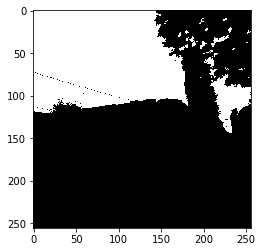

In [8]:
plt.figure()
plt.imshow(lbls[1].data.squeeze(dim = 0).bitwise_not().numpy(), cmap="Greys")
plt.savefig("/home/dmitri/dev/BachelorDiploma/thesis/mmcs_sfedu_thesis/img/iou_vis/mask.png")

In [9]:
intersection = ((torch_mask == 0) & (lbls[1].data == 0)).unique(return_counts=True)
union = ((torch_mask == 0) | (lbls[1].data == 0)).unique(return_counts=True)

In [11]:
(intersection[1][1].to(float) / union[1][1].to(float)) * 100.0

tensor(79.2986, dtype=torch.float64)